In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# load the cleaned data
df = pd.read_csv("gta_housing_clean.csv")
df


,price,bedrooms,bathrooms,sqft,house_type,year_built,neighbourhood,lot_size,garage,distance_to_downtown_km,house_age
0,1954952,4,5,1727,Townhouse,1985,North York,6307,1,9.1,40
1,1759465,3,3,2808,Detached,1986,Mississauga,7706,0,5.4,39
2,2269001,5,1,3691,Detached,1950,Scarborough,4655,0,24.9,75
3,1590051,5,3,1409,Detached,1964,Scarborough,5173,0,20.8,61
4,1119006,2,3,1103,Semi-Detached,1986,Mississauga,1909,1,4.2,39
...,...,...,...,...,...,...,...,...,...,...,...
990,2066024,6,4,2338,Condo,1961,North York,0,0,7.1,64
991,1596250,5,1,770,Semi-Detached,1992,Downtown,2849,1,3.6,33
992,1359802,1,1,2280,Condo,2010,North York,0,0,26.3,15
993,1245943,1,3,1252,Condo,1980,Downtown,0,0,18.6,45


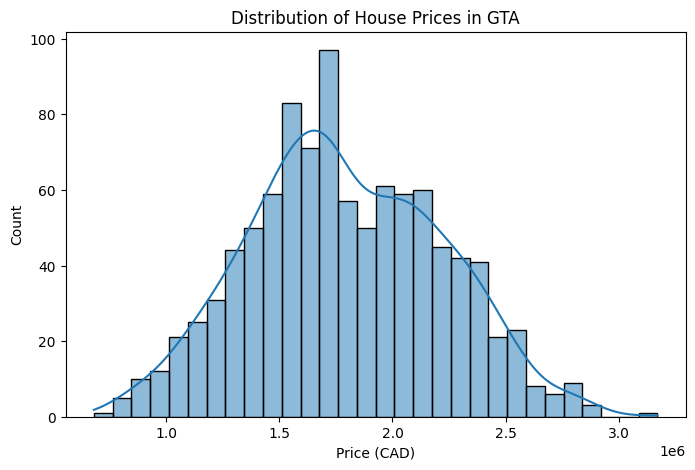

In [4]:
# Exploratory Data Analysis

# Distribution of house prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices in GTA")
plt.xlabel("Price (CAD)")
plt.savefig("distribution_of_house_prices.png", bbox_inches="tight") 
plt.show()

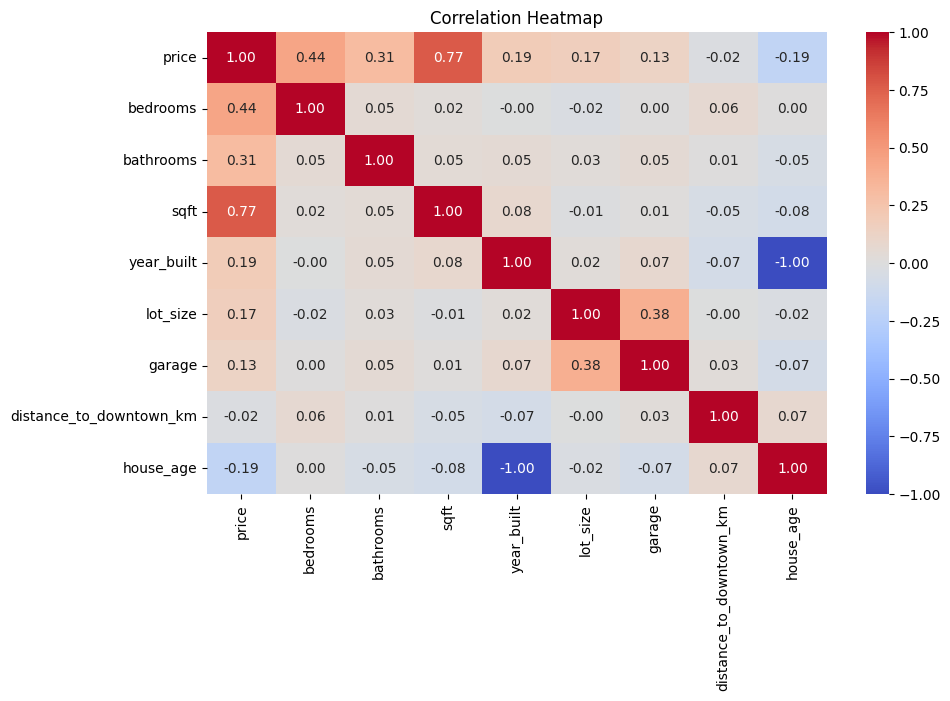

In [5]:
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", bbox_inches="tight") 
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_34536\4143645213.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=df, estimator=np.median, ci=None)


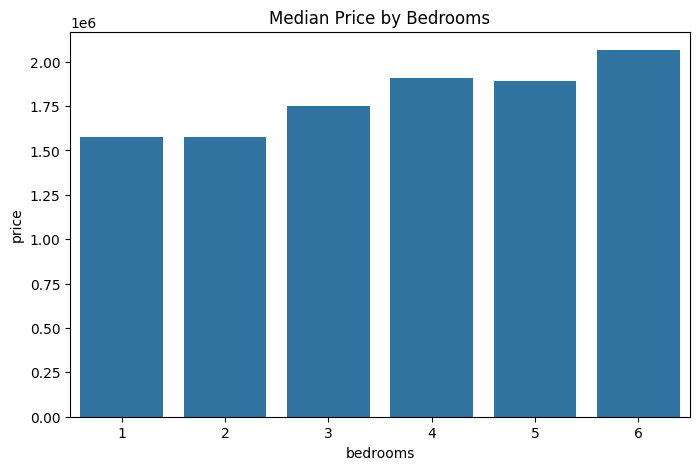

In [6]:
# Price in terms of bedrooms - want to show the variations
plt.figure(figsize = (8, 5))
sns.barplot(x='bedrooms', y='price', data=df, estimator=np.median, ci=None)
plt.title("Median Price by Bedrooms")
plt.savefig("median_price.png", bbox_inches="tight") 
plt.show()

In [7]:
# we want to predict the price based on all the other columns
X = df.drop("price", axis=1)
y = df["price"]

# all variables must be categorical variables as words cannot be handelled by machine learning models
# use one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_preds = lin_reg.predict(X_test)

# random forest regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [8]:

# Evaluation
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Results:")
    print(f" RMSE: {rmse:,.0f}")
    print(f" MAE: {mae:,.0f}")
    print(f" R^2: {r2:.3f}\n")


Linear Regression Results:
 RMSE: 111,938
 MAE: 91,481
 R^2: 0.939

None
Random Forest Results:
 RMSE: 142,701
 MAE: 110,361
 R^2: 0.901

None
sqft                         0.609576
bedrooms                     0.173790
bathrooms                    0.061870
lot_size                     0.054981
neighbourhood_Downtown       0.021959
year_built                   0.019922
distance_to_downtown_km      0.018632
house_age                    0.018213
garage                       0.005899
neighbourhood_Mississauga    0.002627
house_type_Semi-Detached     0.002566
neighbourhood_North York     0.002256
neighbourhood_Etobicoke      0.002186
house_type_Townhouse         0.001858
neighbourhood_Scarborough    0.001848
house_type_Detached          0.001817
dtype: float64


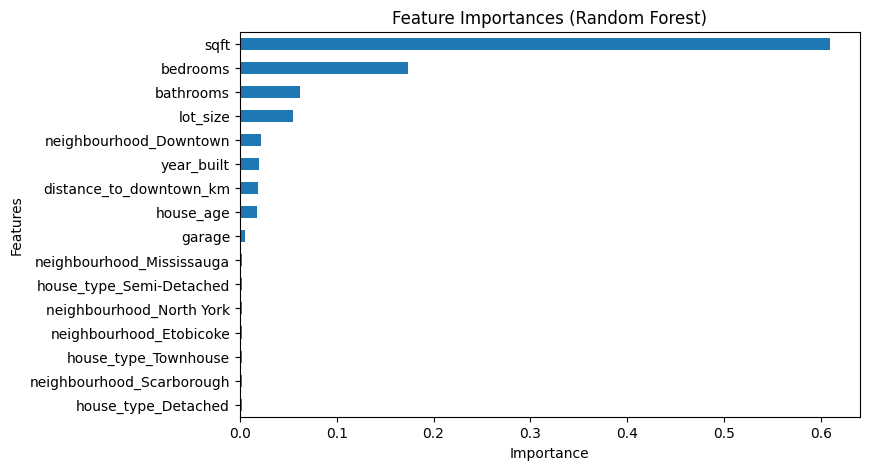

In [ ]:
# Evaluate the models
print(evaluate("Linear Regression", y_test, lin_preds))
print(evaluate("Random Forest", y_test, rf_preds))


# Feature Importances from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(6,4))
print(importances.sort_values(ascending=False))
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig("feature_importance.png", dpi=100, bbox_inches="tight") 
plt.show()

In [10]:
# Predict on the test set
test_preds = rf.predict(X_test)

# Show first 5 comparisons
comparison = pd.DataFrame({
    "Actual Price": y_test.head(5).values,
    "Predicted Price": test_preds[:5].round(0)
})
print(comparison)

   Actual Price  Predicted Price
0       2217832        2154866.0
1       1185141        1363795.0
2        846747         903838.0
3       1073596        1069478.0
4       1574597        1690289.0
